In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense


data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Green AI/ec_data.csv')

data.head()



,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [ ]:
x = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

X_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [ ]:
history = model.fit(X_train,y_train, epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 89314.6250 - mae: 271.0616 - val_loss: 83793.2891 - val_mae: 259.2001
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91468.5078 - mae: 274.8271 - val_loss: 83251.9062 - val_mae: 258.1613
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87087.8750 - mae: 266.3228 - val_loss: 82402.3281 - val_mae: 256.5294
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89105.5625 - mae: 271.0793 - val_loss: 81045.1719 - val_mae: 253.9748
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90733.3984 - mae: 273.5305 - val_loss: 79000.1641 - val_mae: 250.1910
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83748.8438 - mae: 258.2021 - val_loss: 76082.5703 - val_mae: 244.8216
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85699.4922 - mae: 261.8052 - val_loss: 72077.0000 - val_mae: 237.4395
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77686.5547 - mae: 247.6033 - val_loss: 66804.

In [ ]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 694.8788 - mae: 20.0466  
Test Mean Absolute Error: 20.39


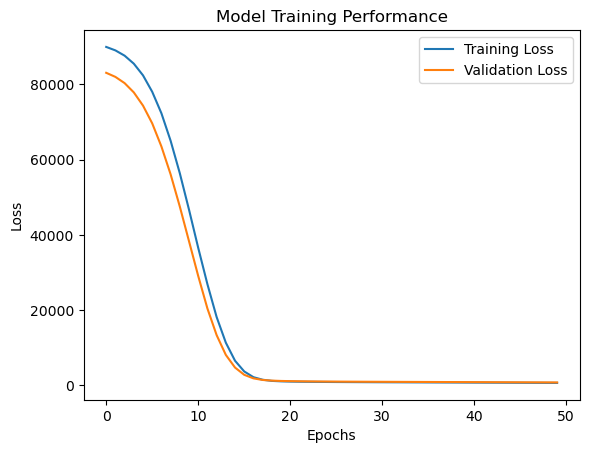

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[291.0234  ],
       [181.9783  ],
       [362.22507 ],
       [216.63832 ],
       [131.74628 ],
       [378.7368  ],
       [224.09772 ],
       [336.66553 ],
       [464.49014 ],
       [372.3207  ],
       [431.95026 ],
       [230.24298 ],
       [204.5062  ],
       [343.17233 ],
       [401.2987  ],
       [488.21036 ],
       [114.28446 ],
       [154.1062  ],
       [522.0623  ],
       [269.48608 ],
       [399.887   ],
       [448.42752 ],
       [228.08972 ],
       [476.80295 ],
       [ 84.79541 ],
       [145.5498  ],
       [222.91931 ],
       [385.4691  ],
       [168.1793  ],
       [374.72333 ],
       [395.08957 ],
       [311.48242 ],
       [403.46048 ],
       [228.82236 ],
       [159.98016 ],
       [227.85307 ],
       [ 34.92069 ],
       [338.04276 ],
       [279.05276 ],
       [516.29443 ],
       [ 73.89449 ],
       [ 93.38348 ],
       [109.98408 ],
       [148.03432 ],
       [296.64267 ],
       [170.9881  ],
       [115.9164  ],
       [391.4

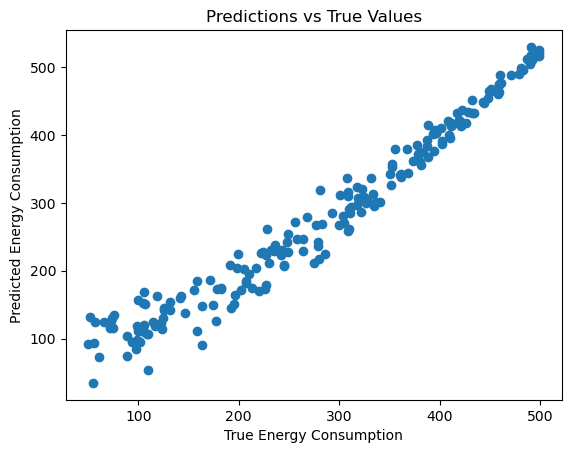

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()

In [3]:
!pip install kaggle

In [5]:
!kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset -p "/content/drive/MyDrive/KaggleDatasets/"


Dataset URL: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
License(s): other
100% 1.45G/1.45G [00:17<00:00, 137MB/s]
100% 1.45G/1.45G [00:17<00:00, 86.7MB/s]
